In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import igraph as ig
import random
import scipy as sp

In [2]:
# Network parameters
N = 500 #number of nodes
av_degree = 8 # average degree
p = float(av_degree)/float(N) #probability of connection in the ER model
m = int(av_degree/2) # number of nodes included at each time step in the BA model
kappa = av_degree # number of neighbors in the WS model

G = nx.barabasi_albert_graph(N,m) # generate a BA network

In [3]:
N = len(G) # Number of nodes
vk = dict(G.degree())
vk = list(vk.values())
print("Number of nodes:", N)
print("Average degree: ", np.mean(vk))

Number of nodes: 500
Average degree:  7.936


In [4]:
# function to simulate the SIR dynamics starting from a set of nodes stored in the variable "seed"
def SIR(G, seeds, beta=0.3, mu=1):    
    def find(v, i): # function to find the positions of element i in vector v
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l

    #Reactive process: SIR dynamics
    vector_states = np.zeros(N) # vector that stores the states of the vertices
    vector_states[seeds] = 1 # vector that stores the states
    ninfected = len(seeds)
    t = 0 # start in t= 0 
    vt = list() # this list stores the time step
    vI = list() # this list stores the fraction of infected nodes
    vR = list() # this list stores the fraction of recovered nodes
    vS = list() # this list stores the fraction of susceptible nodes
    # Reactive model simulation
    while ninfected > 0: # Simulate while we can find infected nodes
        infected = find(vector_states,1) # list of infected nodes
        for i in infected: # try to infect the neighbors
            neigs = G.neighbors(i)
            for j in neigs:
                if np.random.rand() < beta:
                    if(vector_states[j] != 2): # verify if the node is not recovered
                        vector_states[j] = 1
        for k in infected: # try to recover the infected nodes
            if np.random.rand() < mu:
                vector_states[k] = 2
        ninfected = len(find(vector_states,1))
        vI.append(ninfected/N)
        vR.append(len(find(vector_states,2))/N)
        vS.append(len(find(vector_states,0))/N)
        t = t + 1
        vt.append(t)
    return vI, vS, vR, vt

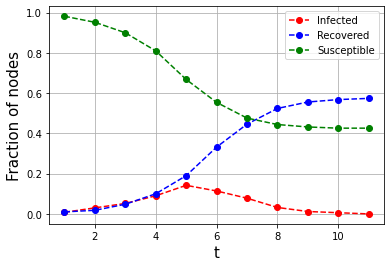

In [5]:
# Epidemic parameters
beta = 0.2 # Probability of infection
mu = 1  # Probability of recovering
#seeds = [0] # seed node 
seeds = random.sample(range(0, N), 5) # select n seed nodes at random
vI, vS, vR, vt = SIR(G, seeds, beta, mu)
    
plt.figure()
plt.plot(vt, vI, 'ro--', label='Infected')
plt.plot(vt, vR, 'bo--', label='Recovered')
plt.plot(vt, vS, 'go--', label='Susceptible')
plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of nodes", fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

## Logistic Map

We considered $N$ logistic maps coupled as:

$x_i(t+1) = (1- \epsilon) f[x_i(t)] + \frac{\epsilon}{b_i} \sum_{j=1}^N \eta_{ij} f[(x_j (t-\tau_{ij})]$ 

$t$: discrete time index

$i$: discrete space index

$f(x) = ax(1-x)$: logistic map equation

$\eta_{ij}$: adjacency matrix

$b_i = \sum_j \eta_{ij}$

$\tau_{ij}$: delay time between the $i$th and $j$th

In [20]:
#M1 = nx.adjacency_matrix(G)
#G_matrix = M1.todense()
G_matrix = nx.to_numpy_array(G)

In [7]:
def logistic(x, a = 0.5): return a*x*(1-x)

In [8]:
def calculate_b(matrix, index): return np.sum(matrix[index])

In [9]:
tau_matrix = []
tau_zero = 5
for i in range(0,500):
    tau = []
    for j in range(0,500):
        tau.append(int(tau_zero + np.random.uniform(0,1)))
    tau_matrix.append(tau)

In [10]:
x = [1]
epsilon = 1
x_t = 0
for i in range(1,10):
    x_t = (1-epsilon)*logistic(x[i-1]) + (epsilon/calculate_b(G,10))*(calculate_b(G,10)*logistic(x[i-1]))
    x.append(x_t)

In [10]:
G_matrix = sp.sparse.csr_matrix.toarray(M1)

In [18]:
G_matrix[0][499]

0

In [36]:
#testando para o nó 1
x_t = []
soma = [] 
for j in range(0,N):
    soma.append((epsilon/calculate_b(G_matrix,0))*G_matrix[0][j]*logistic(0-tau_matrix[0][j]))

x_t = (1-epsilon)*logistic(0)+np.sum(soma)

In [37]:
x_t

-15.0

In [13]:
# #testando para o nó 1
# x_t = [0]
# for t in range(1,100):
#     soma = [] 
#     for j in range(0,N):
# #         soma.append((epsilon/calculate_b(G_matrix,0))*G_matrix[0][j]*logistic(t-tau_matrix[0][j]))

#     x_t = (1-epsilon)*logistic(x_t[t-1])+np.sum(soma)

In [15]:
graph = nx.to_numpy_array(G)

In [17]:
graph

array([[0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])